In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_dir = Path.cwd().parent / "Data"

contacts = data_dir / "Volunteer Augmented Data" / "Contacts_YW.csv"

df = pd.read_csv(contacts)

In [3]:
df = df.iloc[:, 2:]

In [4]:
cols = [
    "Speaks.English",
    "Speaks.Arabic",
    "Speaks.Amazigh",
    "Speaks.French",
    "Age",
    "Currently.Studying",
    "Current.Institution.Type",
    "X..of.Days.Since.Graduation",
    "Mailing.City",
    "MailingState",
    "Number.Days.Until.Job.Placement",
    "Retained.Job.as.of.last.Status.Check",
    "Continuously.Working",
    "X..Of.Days.Continuously.Working",
    "At.Grad.Job.Placement",
    "At.Grad.Placement.Data.Available",
    "X3.Month.Job.Placement",
    "X3.Month.Placement.Data.Available",
    "X6.Month.Job.Placement",
    "X6.Month.Placement.Data.Available",
    "X9.Month.Job.Placement",
    "X9.Month.Placement.Data.Available",
    "X12.Month.Job.Placement",
    "X12.Month.Placement.Data.Available",
    "X3.Month.Job.Retention",
    "X3.Month.Continuously.Working",
    "X3.Month.Post.Placement.Data.Avail.YES",
    "X6.Month.Job.Retention",
    "X6.Month.Continuously.Working",
    "X6.Month.Post.Placement.Data.Avail.YES",
    "X9.Month.Job.Retention",
    "X9.Month.Continuously.Working",
    "X9.Month.Post.Placement.Data.Avail.YES",
    "X12.Month.Job.Retention",
    "X12.Month.Continuously.Working",
    "X12.Month.Post.Placement.Data.Avail.YES",
    "Number.Family.Members",
    "Number.Family.Members.Working",
    "Monthly.Family.Income",
    "Job.Tenure.in.Months..First.",
    "First.Previous.Job.Salary",
    "Job.Tenure.in.Months..Second.",
    "Second.Previous.Job.Salary",
    "Job.Tenure.in.Months..Third.",
    "Third.Previous.Job.Salary",
    "Lives.in.IDP.camp.or.shelter.",
    "NumApps",
    "Grad170days",
    "Retain6mo",
    "working6mo",
    "CohortDK",
    "MailingState.1",
]


In [5]:
drop = [
    "Retained.Job.as.of.last.Status.Check",
    "Continuously.Working",
    "X..Of.Days.Continuously.Working",
    "X3.Month.Job.Retention",
    "X3.Month.Continuously.Working",
    "X3.Month.Post.Placement.Data.Avail.YES",
    "X6.Month.Job.Retention",
    "X6.Month.Continuously.Working",
    "X6.Month.Post.Placement.Data.Avail.YES",
    "X9.Month.Job.Retention",
    "X9.Month.Continuously.Working",
    "X9.Month.Post.Placement.Data.Avail.YES",
    "X12.Month.Job.Retention",
    "X12.Month.Continuously.Working",
    "X12.Month.Post.Placement.Data.Avail.YES",
    "Job.Tenure.in.Months..First.",
    "Job.Tenure.in.Months..Second.",
    "Job.Tenure.in.Months..Third.",
    "Retain6mo",
    "working6mo",
]


In [6]:
X = df.drop(drop, axis=1)

In [7]:
X = X.select_dtypes(np.number)

In [8]:
X = X.dropna(axis=1)

In [9]:
X = X.iloc[:, 2:]

In [10]:
X.isna().sum()

Speaks.Arabic                  0
Speaks.Amazigh                 0
Speaks.French                  0
Age                            0
Currently.Studying             0
X..of.Days.Since.Graduation    0
placement_grad                 0
placement_grad_data            0
placement_3                    0
placement_3_data               0
placement_6                    0
placement_6_data               0
placement_9                    0
placement_9_data               0
placement_12                   0
placement_12_data              0
NumApps                        0
Grad170days                    0
dtype: int64

In [11]:
df = pd.concat([X, df["Retain6mo"]], axis=1)

In [12]:
df = df.dropna()

In [13]:
df.head()

,Speaks.Arabic,Speaks.Amazigh,Speaks.French,Age,Currently.Studying,X..of.Days.Since.Graduation,placement_grad,placement_grad_data,placement_3,placement_3_data,placement_6,placement_6_data,placement_9,placement_9_data,placement_12,placement_12_data,NumApps,Grad170days,Retain6mo
0,1,0,1,22,0,517,1,1,1,1,1,1,1,1,1,1,1,1,0.0
1,1,0,1,29,0,278,1,1,1,1,1,1,1,1,1,1,1,1,1.0
2,1,0,1,26,0,516,1,1,1,1,1,1,1,1,1,1,1,1,0.0
3,1,0,0,23,0,595,0,1,0,1,1,1,1,1,1,1,1,1,0.0
4,1,0,1,26,0,278,1,1,1,1,1,1,1,1,1,1,1,1,1.0


In [14]:
y = df["Retain6mo"]

In [15]:
X = df.drop("Retain6mo", axis=1)

In [16]:
rf = RandomForestClassifier()

In [17]:
y.value_counts()

0.0    1500
1.0    1429
Name: Retain6mo, dtype: int64

In [18]:
rf.fit(X, y)

RandomForestClassifier()

In [19]:
plt.rcParams['figure.dpi'] = 300

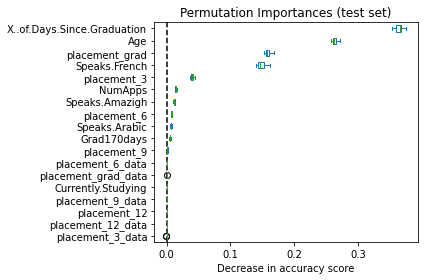

In [20]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X, y, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()